1. **Probability and Expected Value**

   - Generate 10,000 random samples of flipping 3 coins (use `np.random.binomial()`)
   - Plot the probability distribution of getting 0, 1, 2, or 3 heads
   - Calculate the expected value (mean) of your distribution
   - Compare your empirical results with the theoretical probability for each outcome

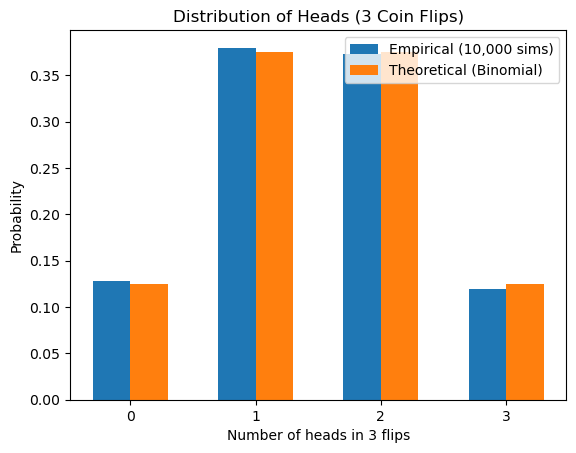

=== Part 1 Results ===
Empirical expected value (mean): 1.4842
Theoretical expected value:       1.5000

Outcome | Empirical P | Theoretical P
   0    |     0.1278 |        0.1250
   1    |     0.3798 |        0.3750
   2    |     0.3728 |        0.3750
   3    |     0.1196 |        0.1250


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

np.random.seed(42)

# 1) Probability and Expected Value (3 coin flips)

n_samples = 10_000
n_flips = 3

# Each sample = number of heads in 3 flips (Binomial with n=3, p=0.5)
heads = np.random.binomial(n=n_flips, p=0.5, size=n_samples)

# Empirical distribution for 0..3 heads
outcomes = np.arange(0, n_flips + 1)
counts = np.bincount(heads, minlength=n_flips + 1)
emp_probs = counts / n_samples

# Theoretical distribution: Binomial PMF
theo_probs = stats.binom.pmf(outcomes, n=n_flips, p=0.5)

# Plot distribution (empirical + theoretical)
plt.figure()
plt.bar(outcomes - 0.15, emp_probs, width=0.3, label="Empirical (10,000 sims)")
plt.bar(outcomes + 0.15, theo_probs, width=0.3, label="Theoretical (Binomial)")
plt.xticks(outcomes)
plt.xlabel("Number of heads in 3 flips")
plt.ylabel("Probability")
plt.title("Distribution of Heads (3 Coin Flips)")
plt.legend()
plt.show()

# Expected value (mean) empirically and theoretically
emp_ev = heads.mean()
theo_ev = n_flips * 0.5

print("=== Part 1 Results ===")
print(f"Empirical expected value (mean): {emp_ev:.4f}")
print(f"Theoretical expected value:       {theo_ev:.4f}\n")

print("Outcome | Empirical P | Theoretical P")
for k, pe, pt in zip(outcomes, emp_probs, theo_probs):
    print(f"{k:^7} | {pe:10.4f} | {pt:13.4f}")


2. **Normal Distribution and Statistical Testing**

   - Generate two samples from normal distributions:
     - Sample A: 100 values with mean=70, std=5
     - Sample B: 100 values with mean=73, std=5
   - Create a box plot comparing the two distributions
   - Conduct an independent t-test to determine if the means are significantly different
   - Calculate and visualize the 95% confidence intervals for both samples

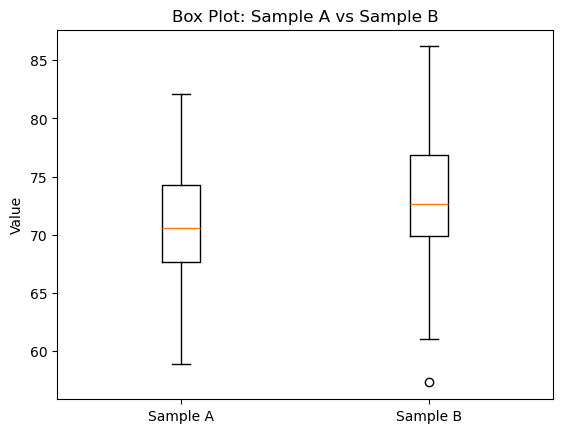


=== Part 2 Results ===
t-statistic: -2.7124
p-value:     0.007268

95% CI for mean:
Sample A mean=70.891, CI=(69.893, 71.889)
Sample B mean=72.851, CI=(71.821, 73.881)


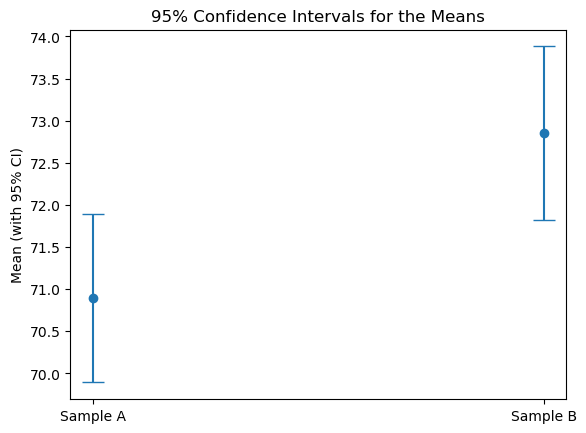

In [2]:
# 2) Normal Distribution and Statistical Testing
# -------------------------------------------------------
n = 100
A = np.random.normal(loc=70, scale=5, size=n)
B = np.random.normal(loc=73, scale=5, size=n)

# Box plot
plt.figure()
plt.boxplot([A, B])
plt.xticks([1, 2], ["Sample A", "Sample B"])
plt.ylabel("Value")
plt.title("Box Plot: Sample A vs Sample B")
plt.show()

# Independent t-test (Welch's t-test is safer if variances differ)
t_stat, p_val = stats.ttest_ind(A, B, equal_var=False)

print("\n=== Part 2 Results ===")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value:     {p_val:.6f}")

# 95% confidence intervals for the mean
def mean_ci_95(x):
    x = np.asarray(x)
    mean = x.mean()
    se = stats.sem(x)  # standard error of mean
    df = len(x) - 1
    tcrit = stats.t.ppf(0.975, df)  # two-tailed 95%
    lo = mean - tcrit * se
    hi = mean + tcrit * se
    return mean, lo, hi

meanA, loA, hiA = mean_ci_95(A)
meanB, loB, hiB = mean_ci_95(B)

print("\n95% CI for mean:")
print(f"Sample A mean={meanA:.3f}, CI=({loA:.3f}, {hiA:.3f})")
print(f"Sample B mean={meanB:.3f}, CI=({loB:.3f}, {hiB:.3f})")

# Visualize CIs
plt.figure()
plt.errorbar(
    x=[0, 1],
    y=[meanA, meanB],
    yerr=[[meanA - loA, meanB - loB], [hiA - meanA, hiB - meanB]],
    fmt="o",
    capsize=8
)
plt.xticks([0, 1], ["Sample A", "Sample B"])
plt.ylabel("Mean (with 95% CI)")
plt.title("95% Confidence Intervals for the Means")
plt.show()


3. **Correlation Analysis**
   - Using the iris dataset (from seaborn), analyze the relationship between:
     - Sepal length and petal length
     - Sepal width and petal width
   - For each pair:
     - Create a scatter plot
     - Calculate the Pearson correlation coefficient and p-value
     - Calculate and interpret the R-squared value
   - Which pair shows a stronger relationship? Explain why.


=== Part 3 Results ===


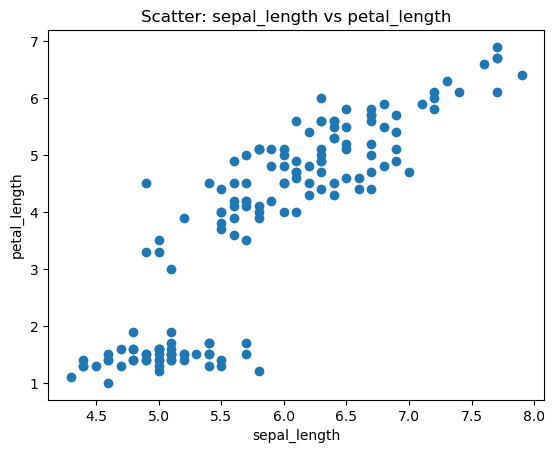

sepal_length vs petal_length: r=0.8718, p=1.03867e-47, R^2=0.7600


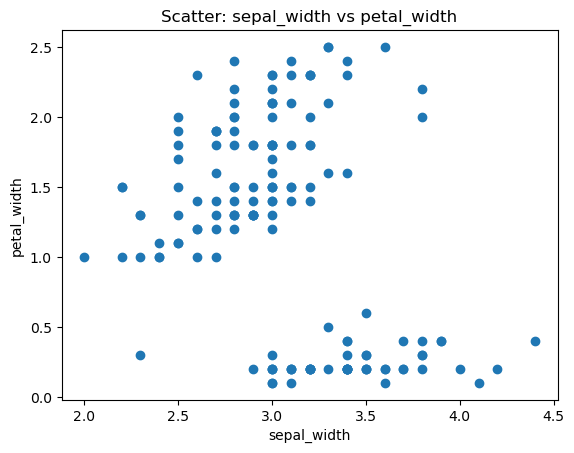

sepal_width vs petal_width: r=-0.3661, p=4.07323e-06, R^2=0.1340

Stronger relationship:
- sepal_length vs petal_length (higher |r| and higher R^2)
Why: A stronger linear relationship means points cluster more tightly around a line,
which shows up as a larger magnitude of Pearson r and a larger R-squared.


In [3]:
# 3) Correlation Analysis (Iris dataset)

iris = sns.load_dataset("iris")  # columns: sepal_length, sepal_width, petal_length, petal_width

pairs = [
    ("sepal_length", "petal_length"),
    ("sepal_width", "petal_width"),
]

print("\n=== Part 3 Results ===")
results = []

for xcol, ycol in pairs:
    x = iris[xcol].to_numpy()
    y = iris[ycol].to_numpy()

    # Scatter plot
    plt.figure()
    plt.scatter(x, y)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(f"Scatter: {xcol} vs {ycol}")
    plt.show()

    # Pearson correlation + p-value
    r, p = stats.pearsonr(x, y)

    # R-squared (for simple linear relationship, R^2 = r^2)
    r2 = r ** 2

    results.append((xcol, ycol, r, p, r2))
    print(f"{xcol} vs {ycol}: r={r:.4f}, p={p:.6g}, R^2={r2:.4f}")

# Which pair is stronger?
df_res = pd.DataFrame(results, columns=["X", "Y", "Pearson_r", "p_value", "R_squared"])
best = df_res.loc[df_res["R_squared"].idxmax()]

print("\nStronger relationship:")
print(f"- {best['X']} vs {best['Y']} (higher |r| and higher R^2)")
print("Why: A stronger linear relationship means points cluster more tightly around a line,")
print("which shows up as a larger magnitude of Pearson r and a larger R-squared.")
